# Интерполационна формула на Лагранж. Теорема за оценка на грешката при интерполация.

#### Задача 1

Да се намери приближено стойността на $\sin \dfrac{\pi}{5}$, като за целта се построи интерпоалционният полином на Лагранж за функцията $\sin(x)$ с възли $x_0=0$, $x_1=\frac{\pi}{6}$, $x_2=\frac{\pi}{3}$, $x_3=\frac{\pi}{2}$. Да се начертаят графиките на двете функции, заедно с точките на интерполация в една коориднатна система. Да се направи оценка на грешката от така направеното приближение и да се сравни с абсолютната грешка.

In [42]:
import numpy as np
import math
import matplotlib.pyplot as plt

x_axis = np.array([0, np.pi / 6, np.pi / 3, np.pi / 2])
y_axis = np.sin(x_axis) 

def lk3(k, x_axis, x):
    res = 1
    for i in range(x_axis.size):
        if i != k:
            res *= (x - x_axis[i]) / (x_axis[k] - x_axis[i])
    return res

def Lk3(x_axis, y_axis, x):
    sum = 0
    for k in range(x_axis.size): 
        sum += y_axis[k] * lk3(k, x_axis, x)
    return sum

x = math.pi / 5  

P = Lk3(x_axis, y_axis, x)
print(f"Interpolated value at x = π/5: {P}")


Interpolated value at x = π/5: 0.5870614872174387


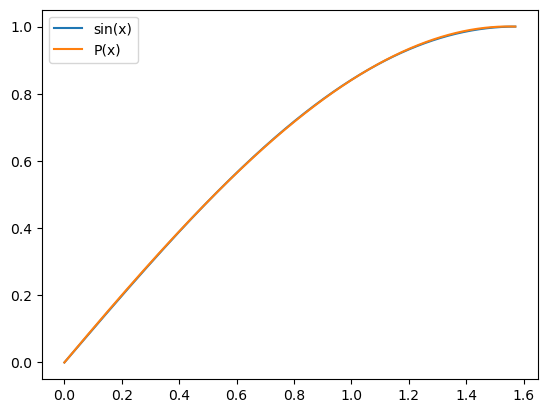

In [45]:
x_points = np.linspace(0, np.pi / 2, 1000)
plt.plot(x_points, np.sin(x_points), x_points, Lk3(x_axis, y_axis, x_points))
plt.legend(['sin(x)', 'P(x)'])
plt.show()

In [53]:
Lk3(x_axis, y_axis, x_points)

array([0.        , 0.00160433, 0.00320833, 0.004812  , 0.00641534,
       0.00801835, 0.00962102, 0.01122335, 0.01282534, 0.01442698,
       0.01602827, 0.01762922, 0.01922981, 0.02083004, 0.02242992,
       0.02402944, 0.02562859, 0.02722738, 0.0288258 , 0.03042384,
       0.03202152, 0.03361881, 0.03521573, 0.03681226, 0.03840841,
       0.04000417, 0.04159954, 0.04319452, 0.0447891 , 0.04638329,
       0.04797707, 0.04957045, 0.05116343, 0.052756  , 0.05434815,
       0.05593989, 0.05753121, 0.05912212, 0.0607126 , 0.06230266,
       0.06389229, 0.06548149, 0.06707026, 0.06865859, 0.07024649,
       0.07183394, 0.07342095, 0.07500752, 0.07659363, 0.0781793 ,
       0.07976451, 0.08134926, 0.08293356, 0.08451739, 0.08610076,
       0.08768366, 0.0892661 , 0.09084806, 0.09242954, 0.09401055,
       0.09559108, 0.09717112, 0.09875068, 0.10032975, 0.10190832,
       0.10348641, 0.105064  , 0.10664109, 0.10821767, 0.10979376,
       0.11136933, 0.1129444 , 0.11451895, 0.11609299, 0.11766

0.0007237650750343549


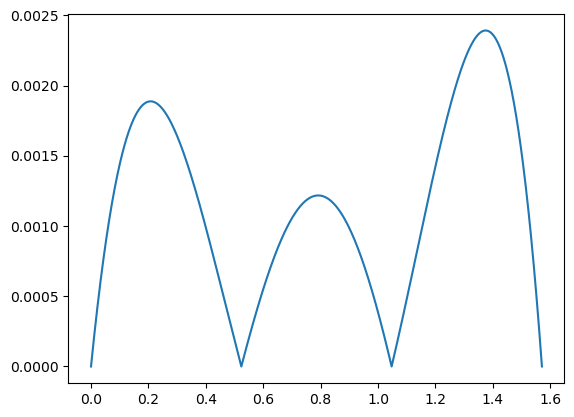

In [78]:
def absolute_error(x):
    return np.abs(np.sin(x) - Lk3(x_axis, y_axis, x))

error = absolute_error(np.pi / 5)
print(error)

plt.plot(x_points, absolute_error(x_points))
plt.show()

## Задача 2*

Да се напише функция *lagrange_poly(f, nodes, x)*, която пресмята стойността на интерполационния полином на Лагранж за функцията *f(x)* с възли *nodes* в точка *x*, при произволен избор на различни възли и функция *f(x)*. Параметърът *nodes* да се интерпретира като масив от реални числа, f - име на функция, a *x*- проивзолно реално число.

In [62]:
def lk(nodes, k, x):
    res = 1
    for i in range(nodes.size - 1):
        if i != k:
            res *= ((x - nodes[i]) / (nodes[k] - nodes[i]))
    return res


def lagrange_poly(f, nodes, x):
    res = 0
    for k in range(nodes.size - 1):
        res += f(nodes[k]) * lk(nodes, k, x)
    return res

#testing if it works with the 1 
def f(x):
    return np.sin(x)

nodes = np.array([0, np.pi / 6, np.pi / 3, np.pi / 2])
x = np.pi / 5
lagrange_poly(f, nodes, x)

0.5839230484541326